In [7]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

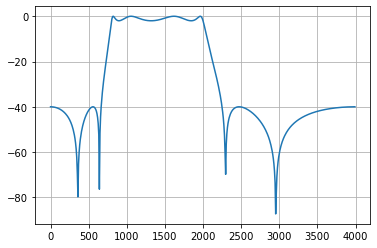

In [8]:
b, a = signal.iirdesign([0.2, 0.5], [0.1, 0.6], 2, 40)
w, h = signal.freqz(b, a)
power = 20*np.log10(np.clip(np.abs(h), 1e-8, 1e100))
plt.plot(w/np.pi*4000, power)
plt.grid()
plt.show()

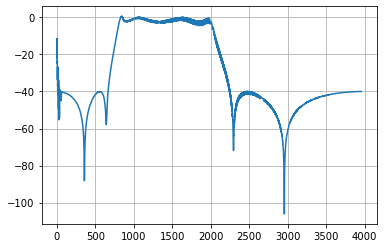

In [9]:
t = np.arange(0, 2, 1/8000.0)
sweep = signal.chirp(t, f0=0, t1=2, f1=4000.0)
out = signal.lfilter(b, a, sweep)
out = 20*np.log10(np.abs(out))
index = np.where(np.logical_and(out[1:-1] > out[:-2], out[1:-1] > out[2:]))[0] + 1
plt.plot(t[index]/2.0*4000, out[index])
plt.grid()
plt.show()